## PROBLEM SATEMENT
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description: Murder -- Muder rates in different places of United States Assualt- Assualt rate in different places of United States UrbanPop - urban population in different places of United States Rape - Rape rate in different places of United States

## IMPORTING LIBRARIES¶

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix


# IMPORTING CSV FILE

In [6]:
df=pd.read_csv("Fraud_check.csv")

# EDA

In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
df.shape

(600, 6)

In [10]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [13]:
df['Taxable.Income'].max() # to dee the maximum value in that column

99619

## Adding A New Column "Fraud_Check"

In [15]:
df['Fraud_Check'] = pd.cut(df['Taxable.Income'], bins=[0, 30000, 1000000], labels=['Risk', 'No Risk'])
df=df.drop('Taxable.Income',axis=1) # we dont need Taxable.Income column now
df.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Fraud_Check
0,50047,10,0,0,1,1,No Risk
1,134075,18,1,0,0,1,No Risk
2,160205,30,0,1,0,1,No Risk
3,193264,15,1,0,1,1,No Risk
4,27533,28,0,1,0,0,No Risk


In [16]:
np.unique(df["Fraud_Check"])

array(['No Risk', 'Risk'], dtype=object)

In [17]:
df["Fraud_Check"].value_counts()

No Risk    476
Risk       124
Name: Fraud_Check, dtype: int64

### Visualisation

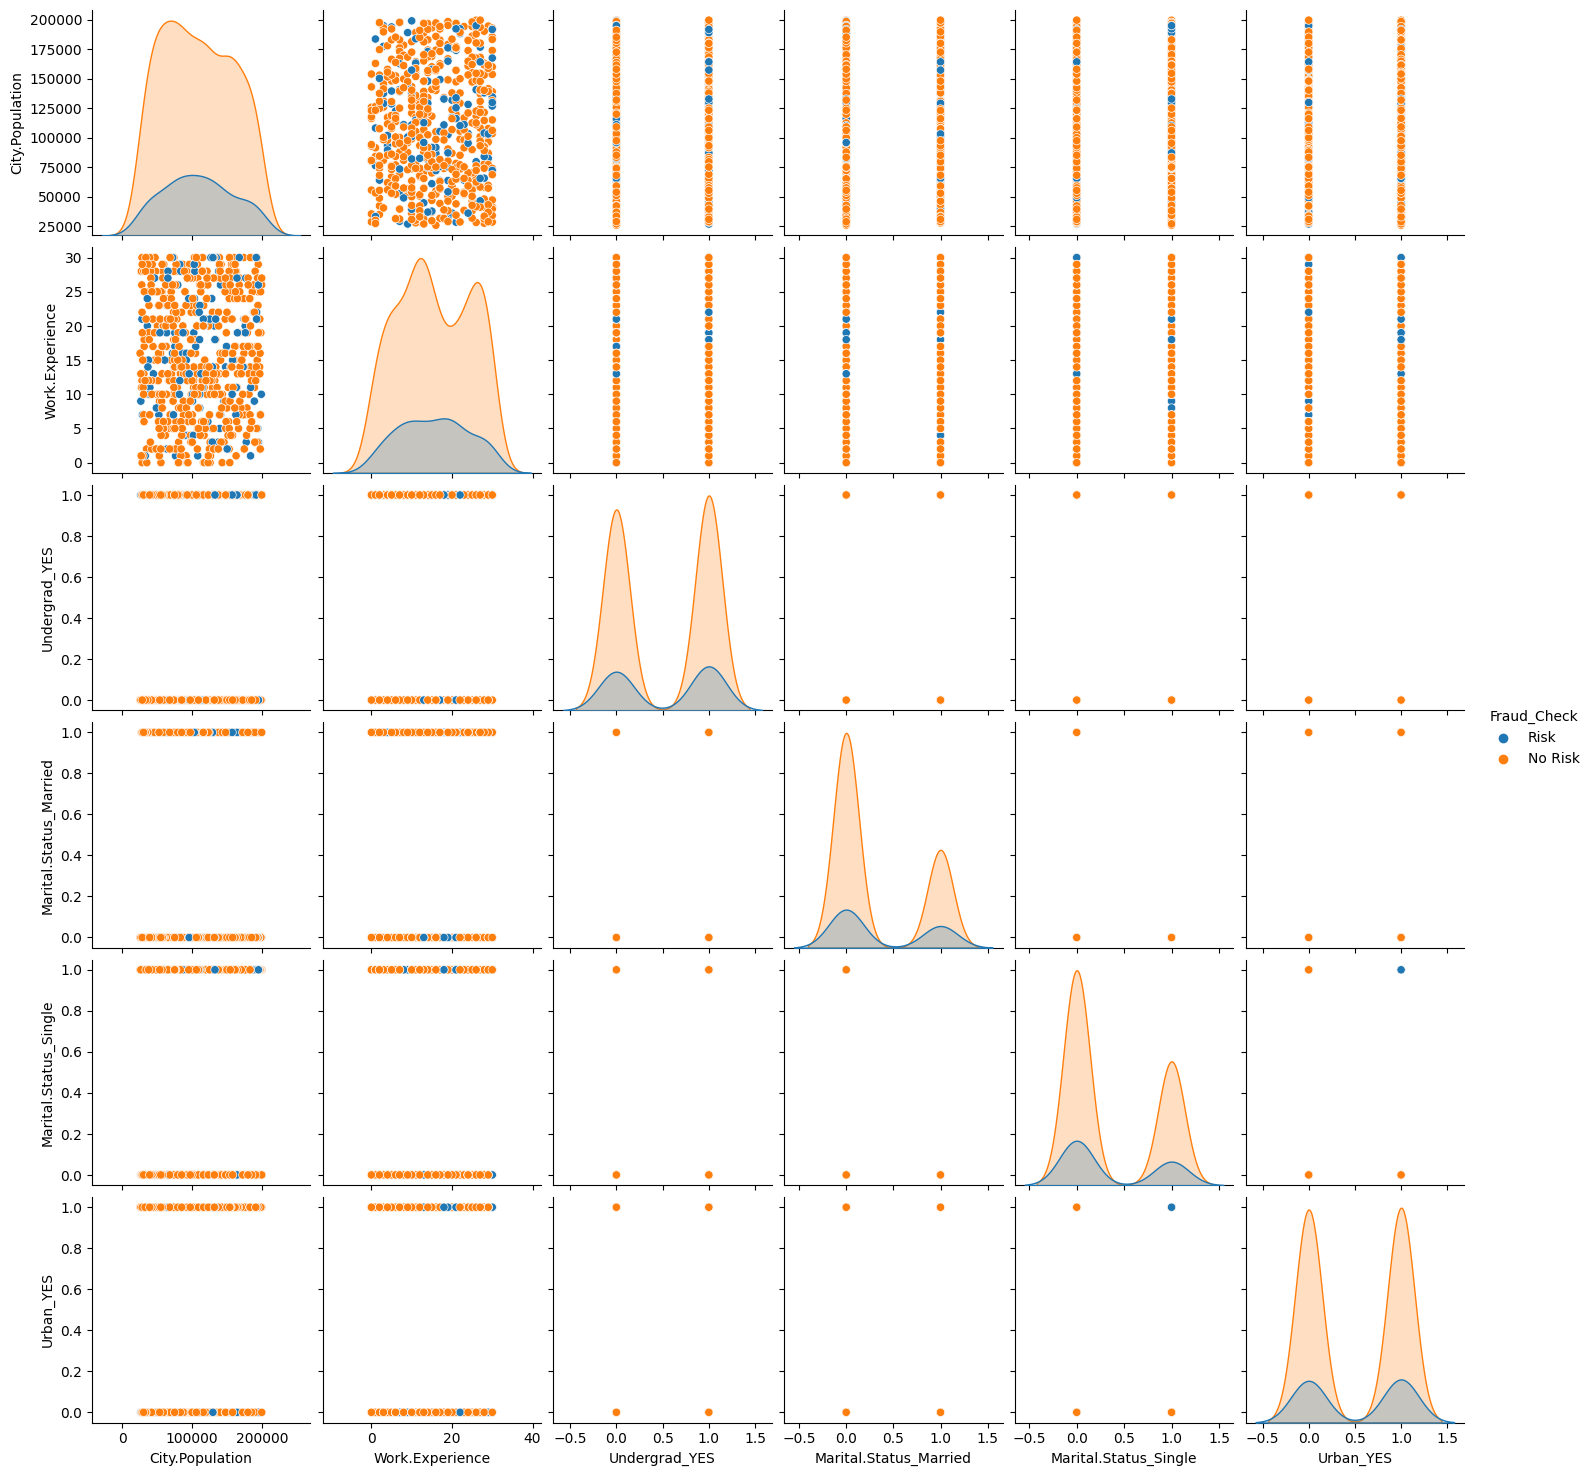

In [18]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Fraud_Check')

<ipython-input-19-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

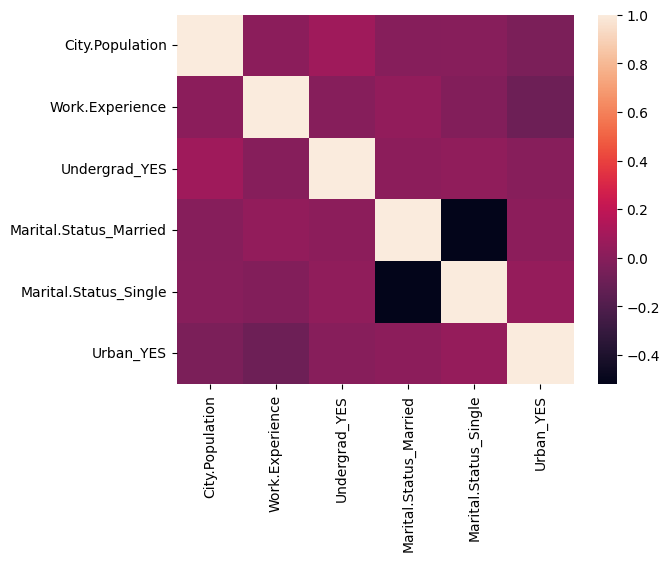

In [19]:
sns.heatmap(df.corr())

# Splitting Data

In [20]:
X=df.iloc[:,0:-1]
y=df.Fraud_Check

In [21]:
X.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [22]:
X.shape

(600, 6)

In [23]:
y.head()

0    No Risk
1    No Risk
2    No Risk
3    No Risk
4    No Risk
Name: Fraud_Check, dtype: category
Categories (2, object): ['Risk' < 'No Risk']

In [24]:
y.shape

(600,)

# Splitting by Training and Testing Data

In [25]:
 X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=44)

In [26]:
X_train.shape

(420, 6)

In [27]:
X_test.shape

(180, 6)

In [28]:
y_train.shape

(420,)

In [29]:
y_test.shape

(180,)

# Building Decision Tree Classifier
### using "gini" Criteria

In [30]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2)

In [31]:
model1

DecisionTreeClassifier(max_depth=10)

In [32]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [33]:
pred=model1.predict(X_test)


In [34]:
pred

array(['No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk', 'No Risk',
       'Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk',
       'Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk', 'No Risk', 'Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No R

In [35]:
X.columns


Index(['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES'],
      dtype='object')

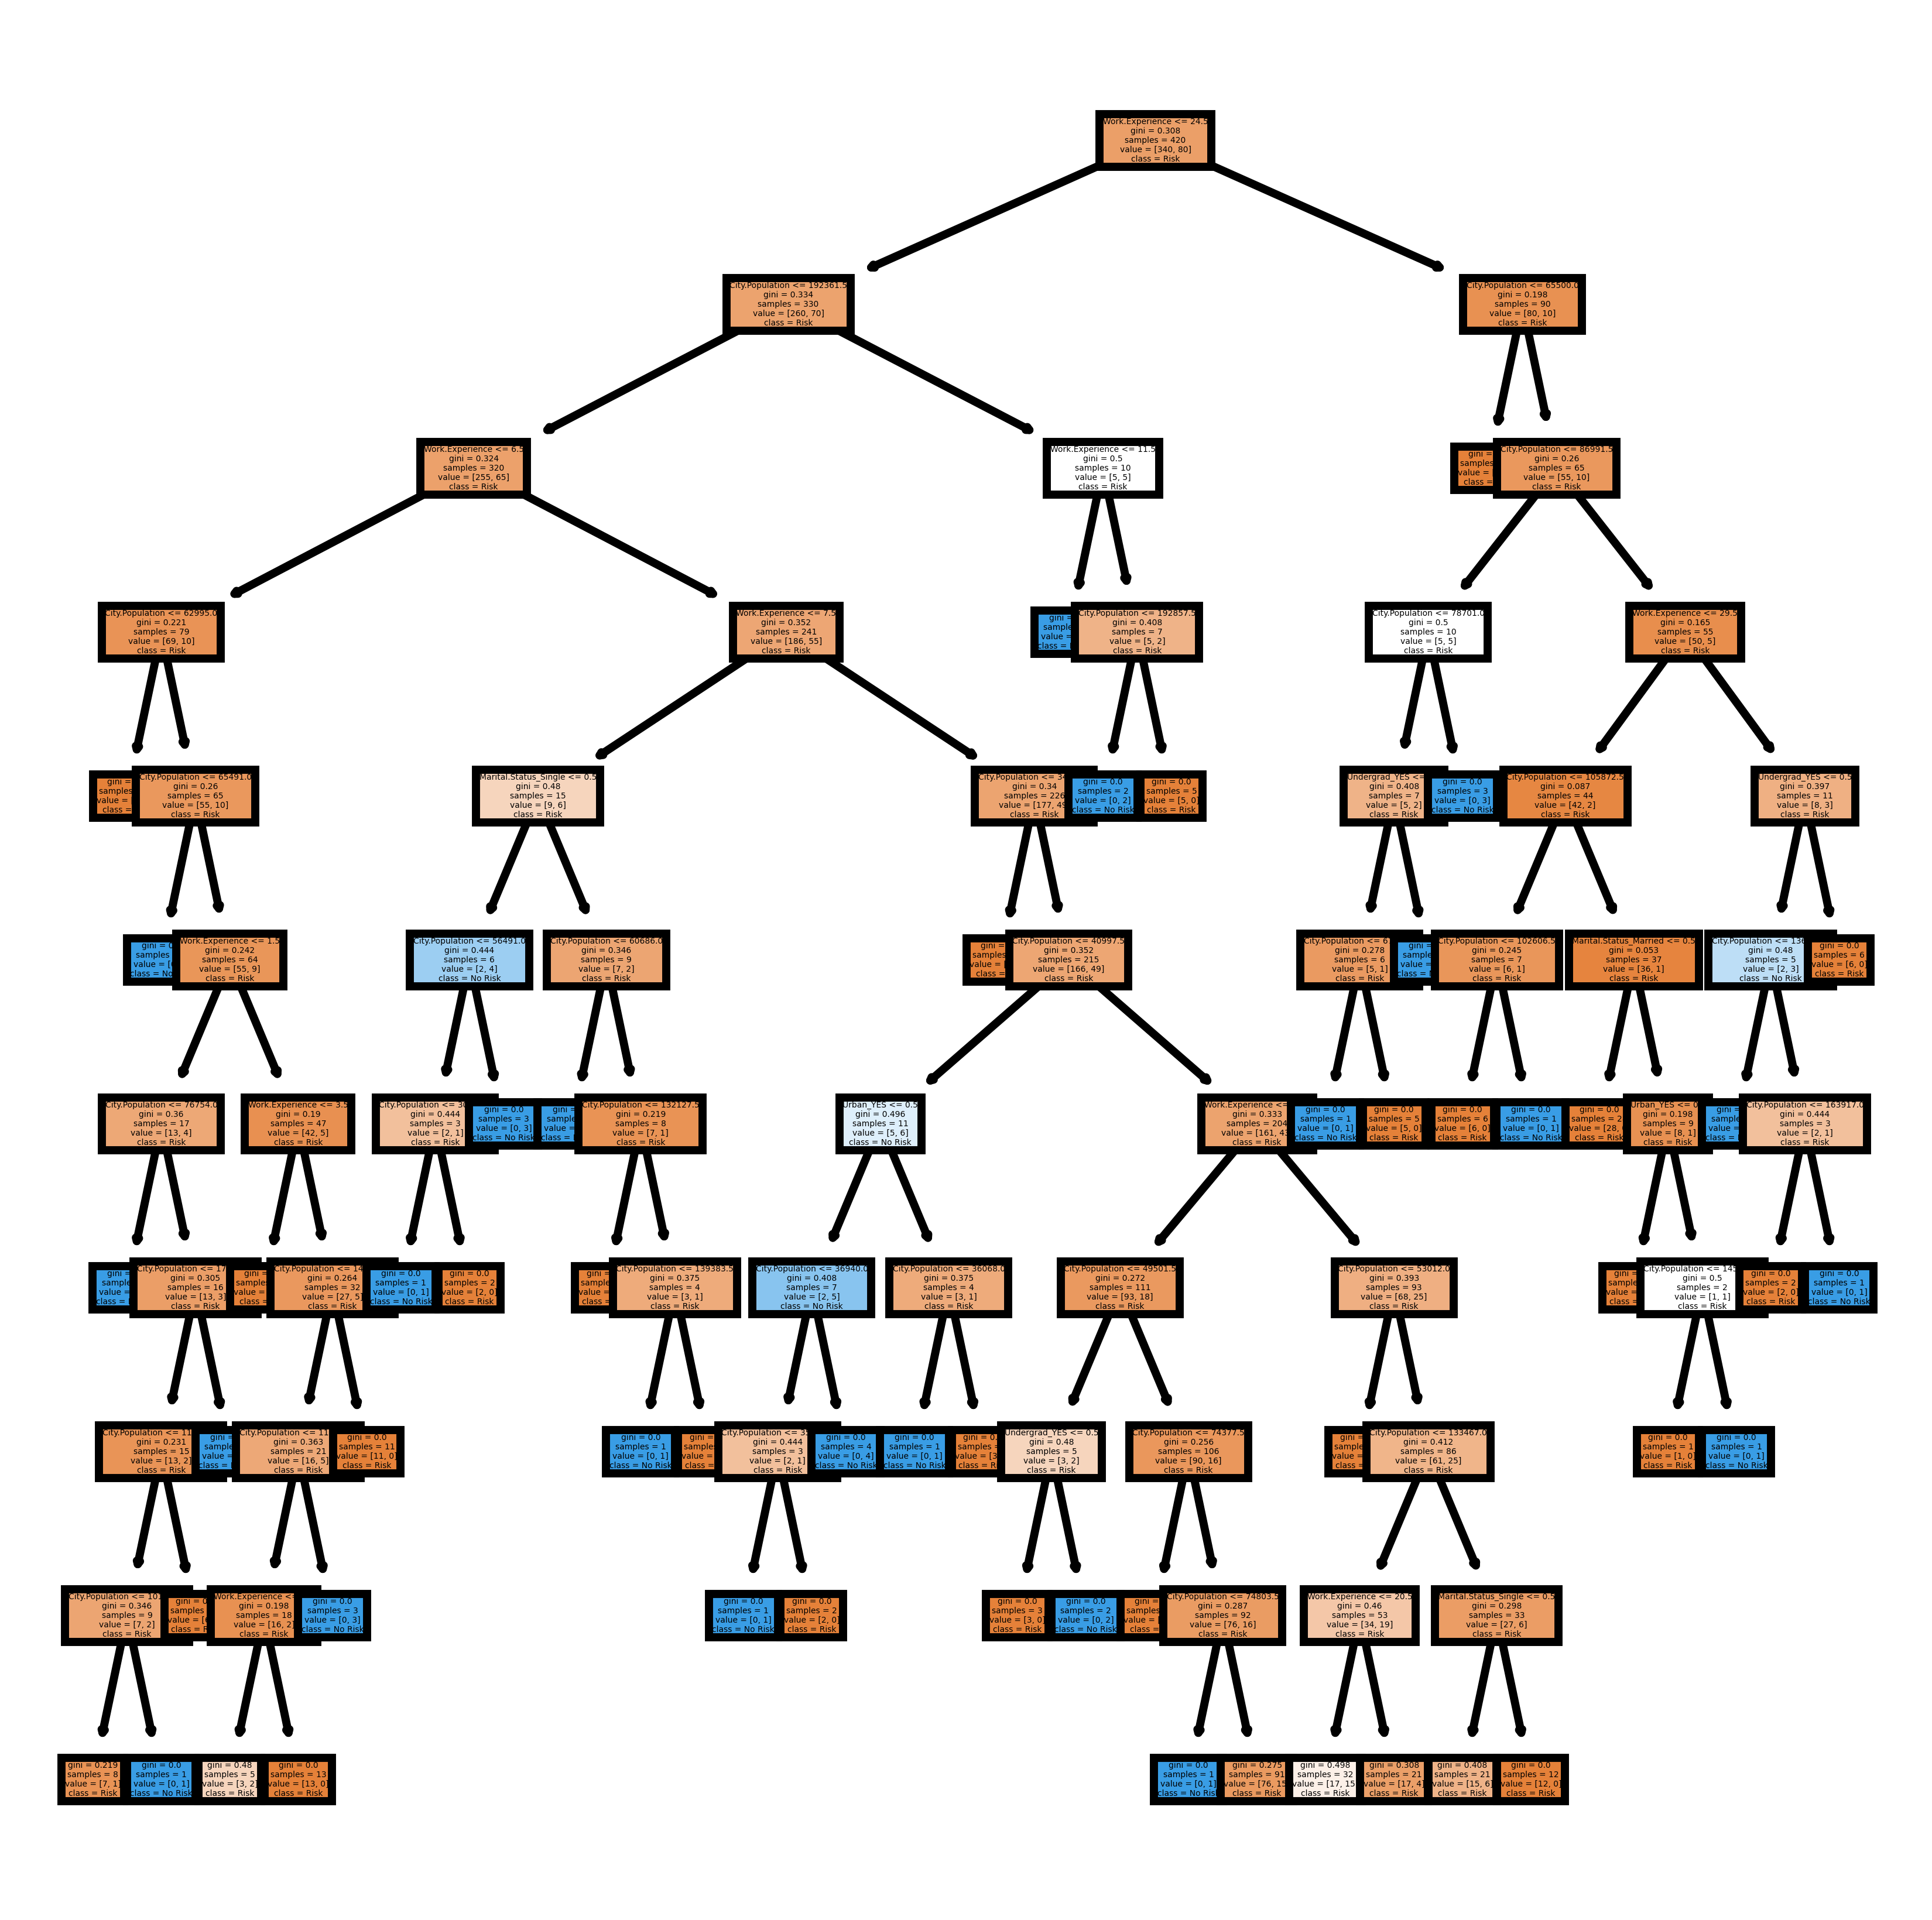

In [36]:
cols=['City.Population', 'Work.Experience', 'Undergrad_YES','Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']
cn=['Risk', 'No Risk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model1,
               feature_names = cols,
               class_names=cn,
               filled = True);

# Accuracy

In [37]:
accuracy_score(pred,y_test)

0.7166666666666667

In [38]:
from sklearn.metrics import classification_report


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     No Risk       0.76      0.92      0.83       136
        Risk       0.27      0.09      0.14        44

    accuracy                           0.72       180
   macro avg       0.51      0.51      0.48       180
weighted avg       0.64      0.72      0.66       180



In [40]:
print(confusion_matrix(y_test,pred))

[[125  11]
 [ 40   4]]


### using "entropy" Criteria

In [41]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=2)

In [42]:
  model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [43]:
pred2=model2.predict(X_test)

In [44]:
pred2

array(['No Risk', 'Risk', 'No Risk', 'Risk', 'No Risk', 'No Risk', 'Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk', 'Risk',
       'No Risk', 'No Risk', 'Risk', 'No Risk', 'No Risk', 'Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',


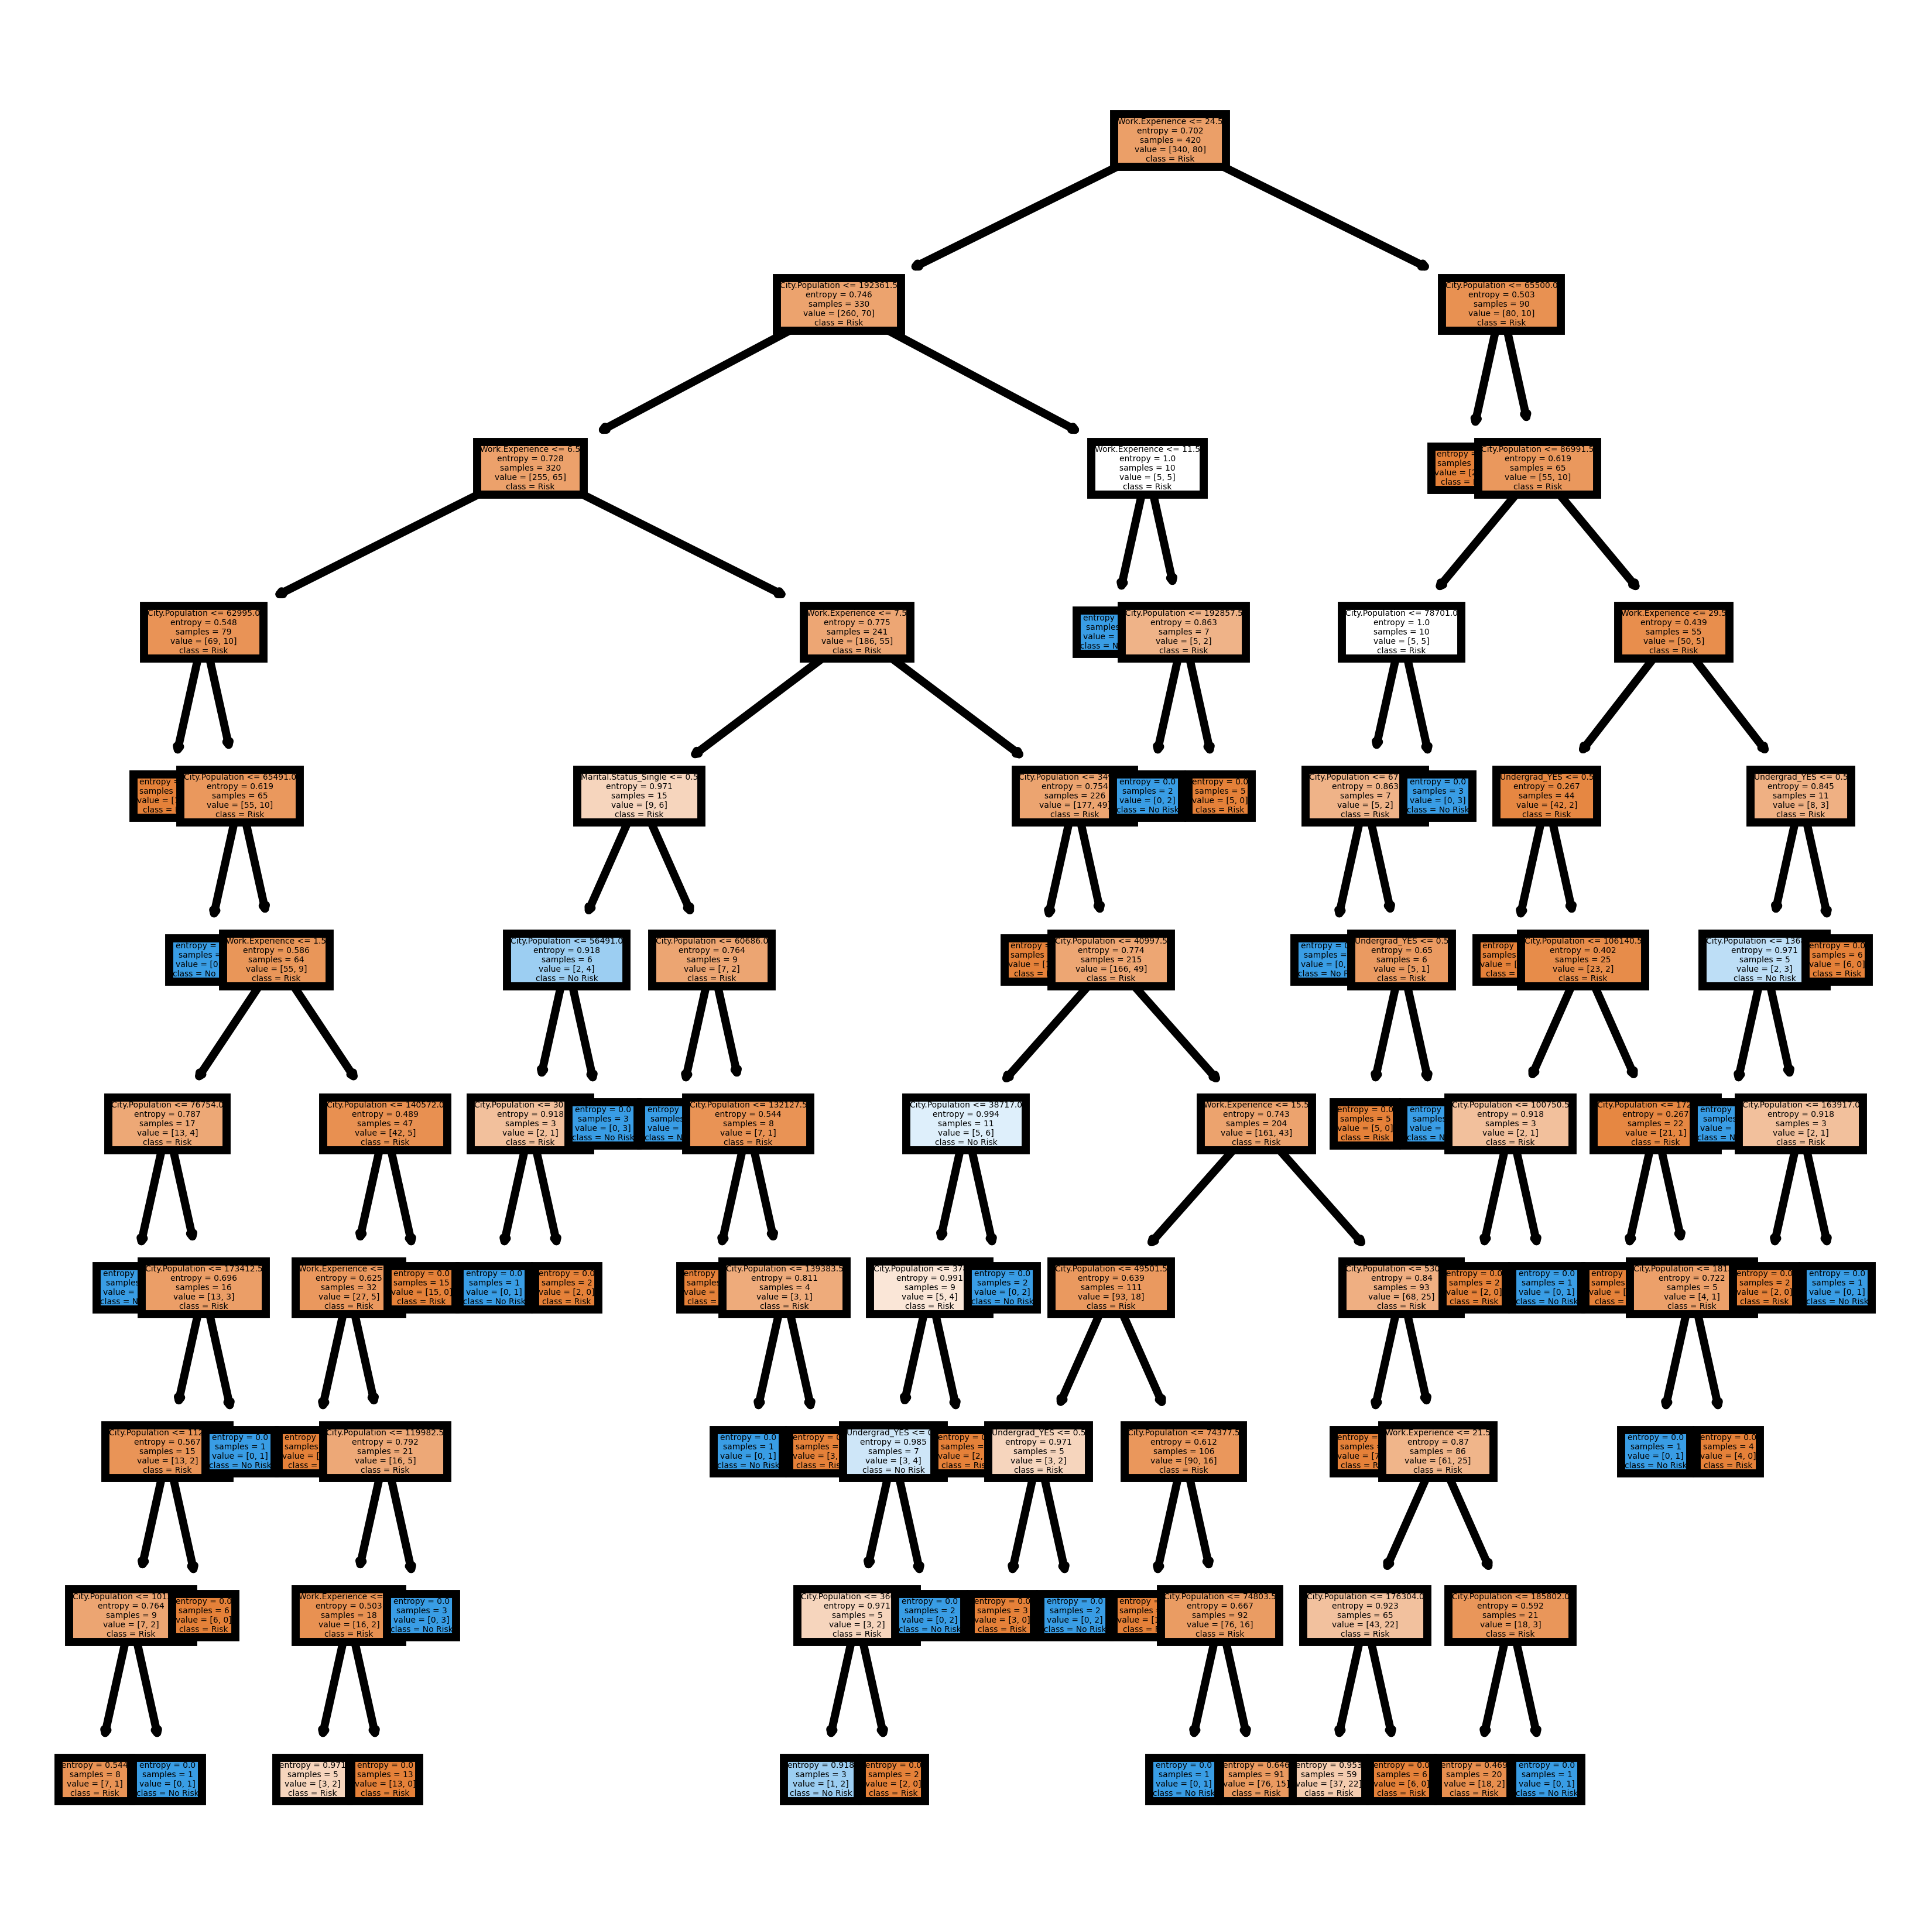

In [45]:
cols=['City.Population', 'Work.Experience', 'Undergrad_YES','Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']
cn=['Risk', 'No Risk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model2,
               feature_names = cols,
               class_names=cn,
               filled = True);

# Accuracy

In [46]:
accuracy_score(pred2,y_test)

0.7

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

     No Risk       0.75      0.90      0.82       136
        Risk       0.19      0.07      0.10        44

    accuracy                           0.70       180
   macro avg       0.47      0.49      0.46       180
weighted avg       0.61      0.70      0.64       180



In [48]:
print(confusion_matrix(y_test,pred2))

[[123  13]
 [ 41   3]]


# Inference
1) For gini
we got accuracy of 71.66%
2) for entropy
we got accuracy of 70%
so by the data we can say that gini model is more accurate and by confusion matrix as well we can see that false values are lesser in gini

### so gini model is best model here